# Estatítica com Python

In [1]:
##Teste

## Importando a biblioteca pandas e lendo o dataset do projeto 

In [2]:
#Importa a biblioteca pandas e a renomeia como 'pd'

import pandas as pd

In [3]:
#cria a variável "dados" e atribui a ela o dataset dados.csv. Após, lê as primeiras linhas do dataset

dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Tipos de dados

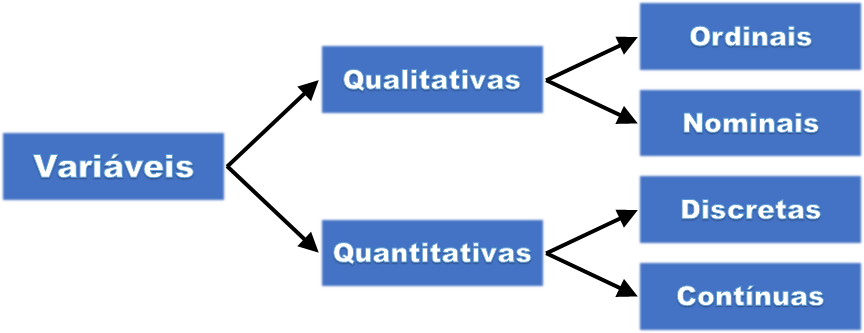

#### Variáveis qualitativas ordinais: 
#### variáveis que podem ser ordenadas ou hierarquizadas


In [4]:
# O comando unique() seleciona os valores únicos apresentados no campo de referência entre [], do dataset utilizado. 
# O comando sorted ordena esses valores em ordem crescente.

sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais: 
#### variáveis que não podem ser ordenadas ou hierarquizadas

In [5]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [6]:
sorted(dados['Sexo'].unique())

[0, 1]

In [7]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas: 
#### Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

##### 1 - Verificando o intervalo de idade abordada no dataset

In [8]:
#O comando "print" mostra na tela o comando dentro do parênteses
#Os comandos .min() e .max() retornam os valores mínimo e máximo da variável selecionada (no caso, variável idade, do dataset dados)
#O comando %s atribui a uma string o valor encontrado no comando acima, quando utilizado juntamente com %.

print ('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


##### 2 - Verificando o intervalo de altura abordada no dataset

In [9]:
print ('De %s até %s metros' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


## Distribuição de Frequência

### Distribuição de Frequência para Variáveis Qualitativas

In [10]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [12]:
dados['Sexo'].value_counts(normalize = True)*100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [13]:
frequencia = dados['Sexo'].value_counts()

In [14]:
percentual = dados['Sexo'].value_counts(normalize = True)*100

In [15]:
dist_freq_qualitativas = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [21]:
dist_freq_qualitativas.rename(index = {0: 'Masculino',1: 'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace = True)

In [22]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### Distribuição de Frequência para Variáveis Quantitativas

In [28]:
dados.Renda.describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [24]:
dados.Renda.min()

0

In [26]:
dados.Renda.max()

200000

In [29]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [30]:
labels = ['E', 'D', 'C', 'B', 'A']

In [31]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [32]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [40]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest=True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [41]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest=True),
    normalize = True)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [42]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [45]:
dist_freq_quantitativas_personalizadas.rename_axis('Classe Social', axis='columns', inplace = True)
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

Classe Social,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


In [47]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

Estaturas,Frequência,Porcentagem (%)
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


# Histograma

In [48]:
import seaborn as sns

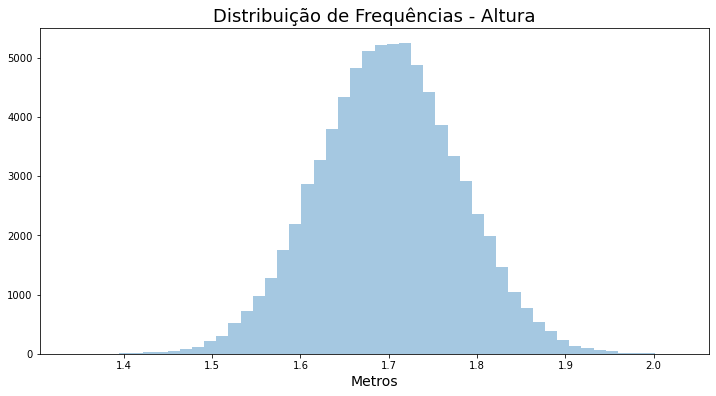

In [50]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax;

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

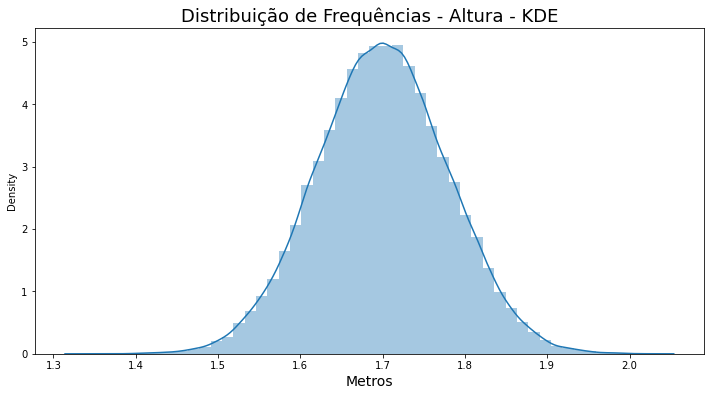

In [51]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

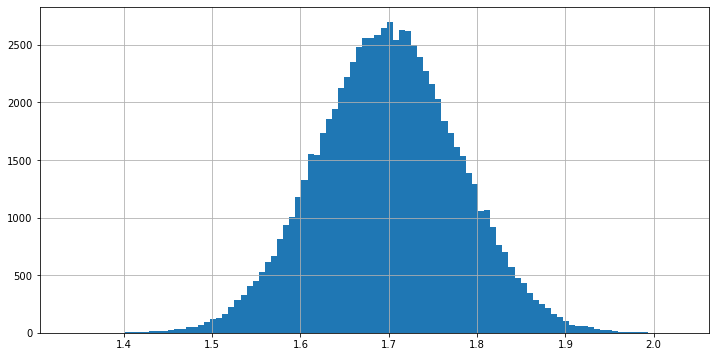

In [59]:
dados.Altura.hist(bins = 100, figsize=(12,6));

In [60]:
dist_freq_quantitativas_personalizadas

Classe Social,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


<AxesSubplot:>

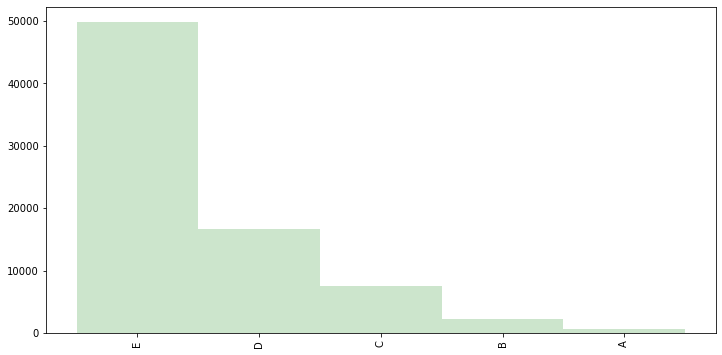

In [67]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width = 1, color = 'green', alpha = 0.2, figsize= (12, 6))